# Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Parameters
img_height, img_width = 64, 64
num_classes = 43
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

# Load Train Data

In [ ]:
train_labels = pd.read_csv("dataset/Train.csv")

X_train, y_train = [], []
for i, row in train_labels.iterrows():
    img_path = os.path.join("dataset", row['Path'])
    img = Image.open(img_path).resize((img_height, img_width))
    X_train.append(np.array(img))
    y_train.append(row['ClassId'])

X_train = np.array(X_train) / 255.0
y_train = to_categorical(y_train, num_classes=num_classes)

# Split into train/validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Load Test Data

In [ ]:
test_labels = pd.read_csv("dataset/Test.csv")

X_test, y_test = [], []
for i, row in test_labels.iterrows():
    img_path = os.path.join("dataset", row['Path']) 
    img = Image.open(img_path).resize((img_height, img_width))
    X_test.append(np.array(img))
    y_test.append(row['ClassId'])

X_test = np.array(X_test) / 255.0
y_test = to_categorical(y_test, num_classes=num_classes)

# Build CNN Model

In [ ]:
model = Sequential([
    Input(shape=(img_height, img_width, 3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')   # 43 classes
])

# Train the Model

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 52s 52ms/step - accuracy: 0.6607 - loss: 1.1879 - val_accuracy: 0.9411 - val_loss: 0.2270
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.8918 - loss: 0.3509 - val_accuracy: 0.9764 - val_loss: 0.1097
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.9293 - loss: 0.2257 - val_accuracy: 0.9850 - val_loss: 0.0690
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 45s 46ms/step - accuracy: 0.9498 - loss: 0.1619 - val_accuracy: 0.9881 - val_loss: 0.0507
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 45s 45ms/step - accuracy: 0.9578 - loss: 0.1325 - val_accuracy: 0.9887 - val_loss: 0.0482
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.9638 - loss: 0.1107 - val_accuracy: 0.9908 - val_loss: 0.0448
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 478s 487ms/step - accuracy: 0.9714 - loss: 0.0867 - val_accuracy: 0.9908 - val_loss: 0.0392
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 44s 45ms/step - accuracy: 0.9748 - loss: 0.0790 

# Plot accuracy & loss curves

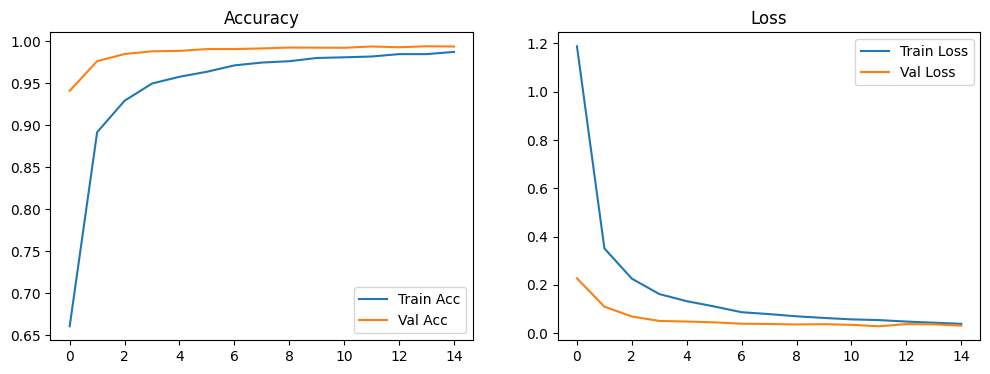

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()

# Evaluation

395/395 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9713 - loss: 0.1383
Test Accuracy: 0.9713
395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


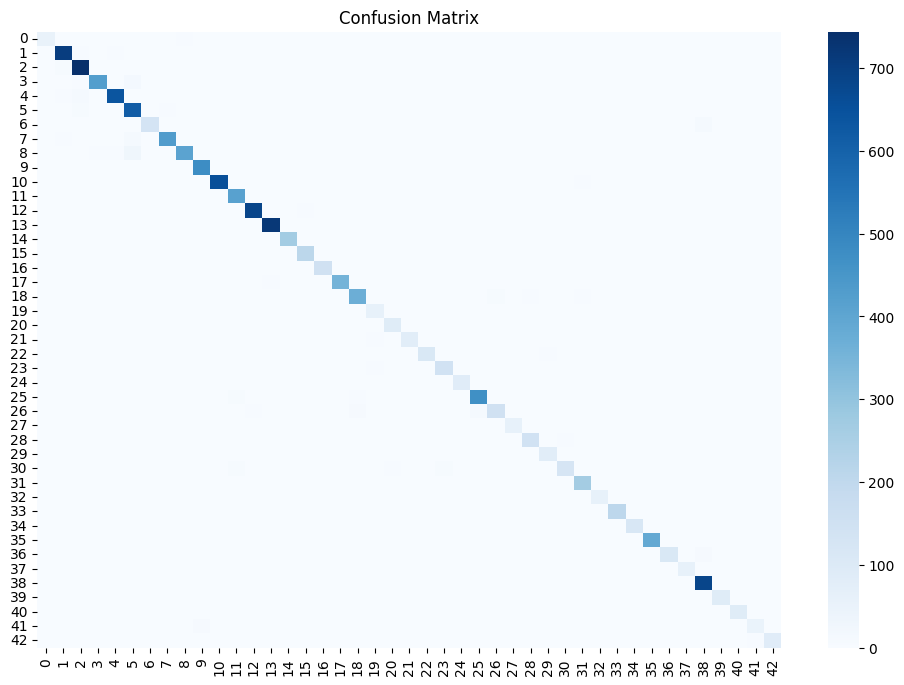

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        60
           1       0.97      0.98      0.98       720
           2       0.96      0.99      0.98       750
           3       0.98      0.94      0.96       450
           4       0.98      0.97      0.97       660
           5       0.91      0.98      0.94       630
           6       0.99      0.89      0.93       150
           7       0.98      0.96      0.97       450
           8       0.98      0.91      0.94       450
           9       0.98      1.00      0.99       480
          10       1.00      0.99      1.00       660
          11       0.96      0.98      0.97       420
          12       0.99      0.99      0.99       690
          13       0.99      1.00      0.99       720
          14       1.00      1.00      1.00       270
          15       0.97      1.00      0.98       210
          16       0.99      0.99      0.99       150
          17       1.00    

In [8]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

# Confusion Matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred))